In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [56]:
# Read & clean layoffs.csv data

data = pd.read_csv('/Users/jamesfisher/Documents/GitHub/Data-Science-Project/data/layoffs.csv')
# display(data.head())

# print(data.isnull().sum())
data['location'] = data['location'].fillna('Unknown')
data['industry'] = data['industry'].fillna('Unknown')
data['stage'] = data['stage'].fillna('Unknown')
# Replaced missing total_laid_off values with 0, assuming no layoffs were reported for these rows
data['total_laid_off'] = data['total_laid_off'].fillna(0)
# print(data.isnull().sum())

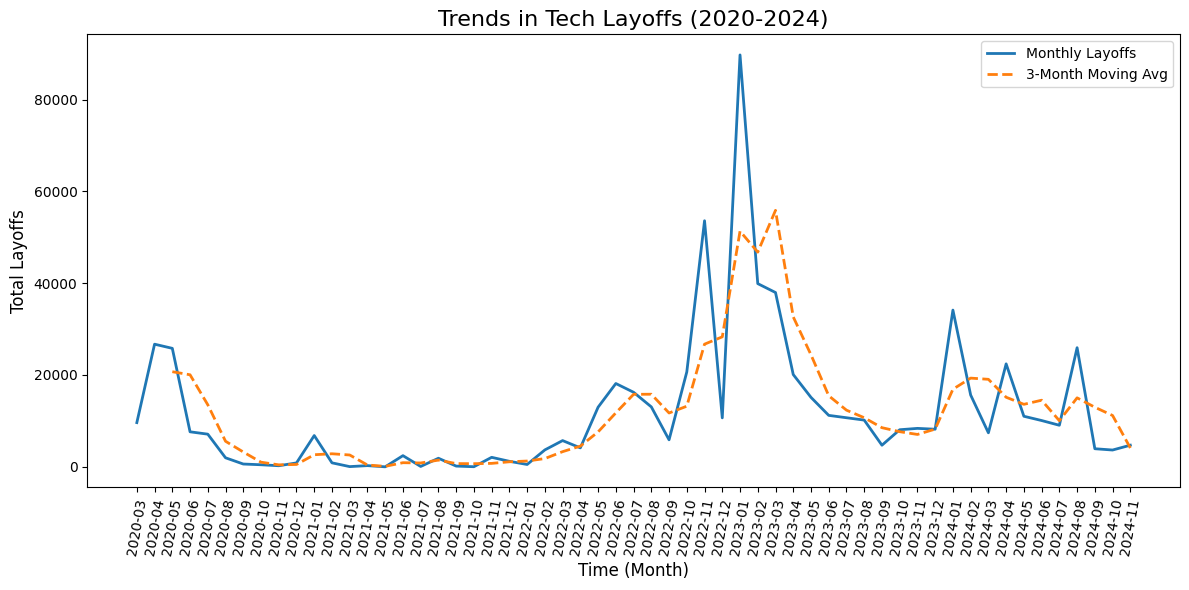

In [70]:
# What trends can be observed in the number of layoffs over time?

# 1. Ensure all dates are in datetime64
# print(data['date'].dtype)

# 2. Group the data by month/year and calculate the total number of layoffs for each time period
monthly_layoffs = data.groupby(data['date'].dt.to_period('M'))['total_laid_off'].sum()
# print(monthly_layoffs)

# 3. Compute a moving average (3-month rolling average) to smooth out short-term fluctuations
monthly_layoffs_moving_avg = monthly_layoffs.rolling(window=3).mean()


# 4. Plot the raw aggregated data and the moving average to visualize trends over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_layoffs.index.astype(str), monthly_layoffs, label='Monthly Layoffs', linewidth=2)
plt.plot(monthly_layoffs.index.astype(str), monthly_layoffs_moving_avg, label='3-Month Moving Avg', linewidth=2, linestyle='--')

plt.title('Trends in Tech Layoffs (2020-2024)', fontsize=16)
plt.xlabel('Time (Month)', fontsize=12)
plt.ylabel('Total Layoffs', fontsize=12)

plt.legend()
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

# 5. Analyze notable peaks and troughs by observing the plot
